<h1><strong>Algoritmo de agrupamento C-Means</h1></strong>

<strong>Aluno: Wallace Ketler Melo de Morais</strong>

Inicialmente devemos incluir as bibliotecas usadas no algoritmo

In [ ]:
import matplotlib.pyplot as plt
import random
import math

<h1><strong>Não supervisionado</strong></h1>

<strong>Treinamento</strong>


Para o treinamento não supervisionado, deve-se escolher a quantidade total de amostras e de grupos usados no experimento. Posteriormente a isso, foi feita uma colocação aleatória das amostras no plano, de modo que elas estão separadas no eixo $X$ em $n$ partes, tal que $n$ é o número de grupos escolhido. Complementarmente, os centros foram gerados aleatoriamente, uma vez que não temos conhecimento a prori no caso não supervisionado.

300


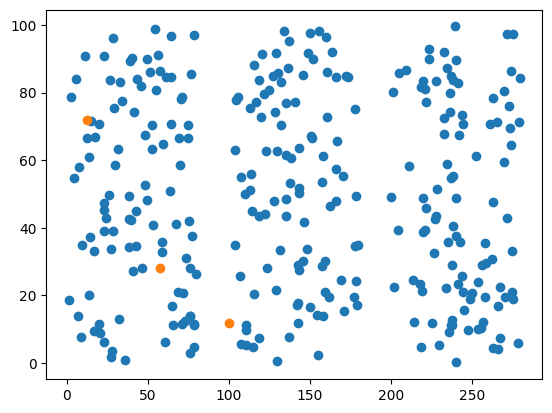

In [ ]:
#Define quantidade de grupos
quantidade_grupos = 3
#Define n valores aleatórios
quantidade_amostras = 300
valores_x = []
valores_y = []
for j in range(quantidade_grupos):
  for i in range(int(quantidade_amostras/quantidade_grupos)):
    valores_x.append(random.uniform(((quantidade_amostras/quantidade_grupos)*j),((quantidade_amostras/quantidade_grupos)*(j+1))-20))
    valores_y.append(random.uniform(0,100))
plt.scatter(valores_x,valores_y)
print(len(valores_x))

#Define centro dos grupos inicialmente aleatórios
centros_x = []
centros_y = []
for j in range(quantidade_grupos):
  centros_x.append(random.uniform(0,100))
  centros_y.append(random.uniform(0,100))
plt.scatter(centros_x, centros_y)

#Mostra disposição inicial
plt.show()


Após a plotagem inicial, o algoritmo C-Means é executado, de forma que encontramos a matriz de pertinência por meio do cálculo da distância de cada ponto até cada um dos centros. Com isso, podemos verificar qual o centro mais próximo a cada ponto e dizer a qual grupo cada ponto amostral pertence. A média dos valores das coordenadas $x$ e $y$ dos valores pertencentes a cada grupo possibilitam o cálculo do novo valor da posição de cada centro. Nesse sentido, dado um número pré-definido de repetições, os ajustes que acontecem a cada iteração pode ser visualizada na plotagem abaixo:

Quantidade de amostras em cada grupo: [52, 204, 44]


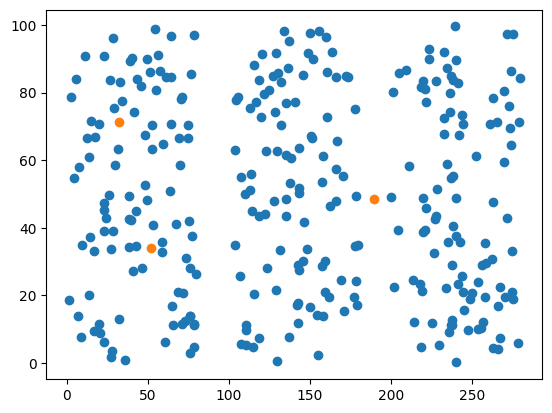

Quantidade de amostras em cada grupo: [75, 179, 46]


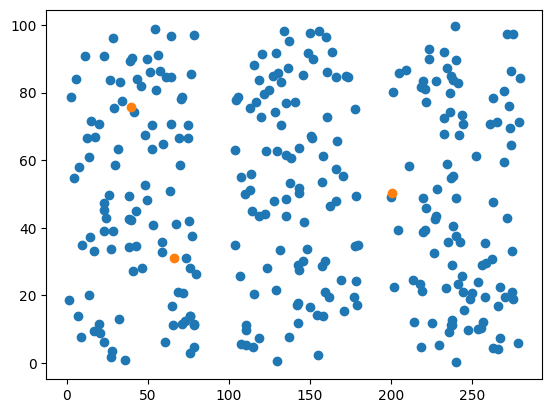

Quantidade de amostras em cada grupo: [83, 163, 54]


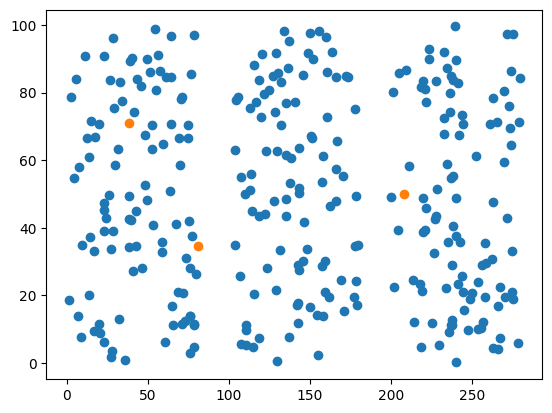

Quantidade de amostras em cada grupo: [91, 142, 67]


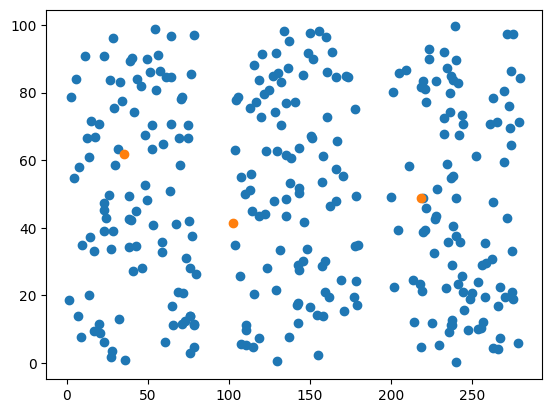

Quantidade de amostras em cada grupo: [100, 121, 79]


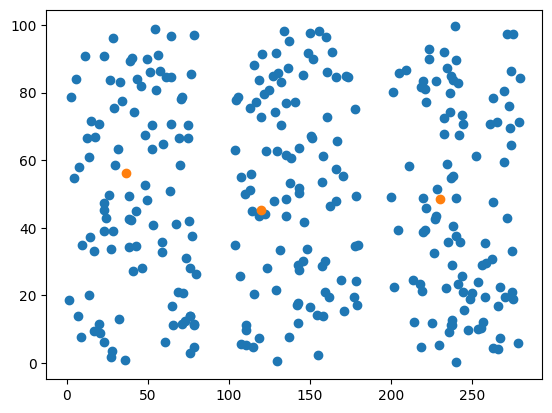

Quantidade de amostras em cada grupo: [102, 107, 91]


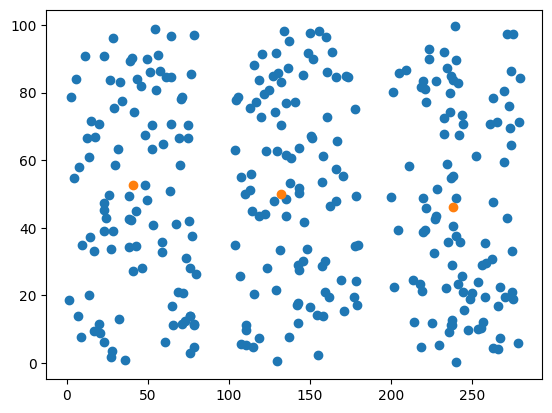

Quantidade de amostras em cada grupo: [100, 100, 100]


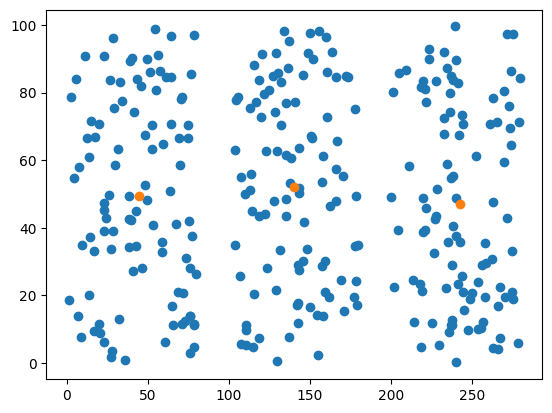

Quantidade de amostras em cada grupo: [100, 100, 100]


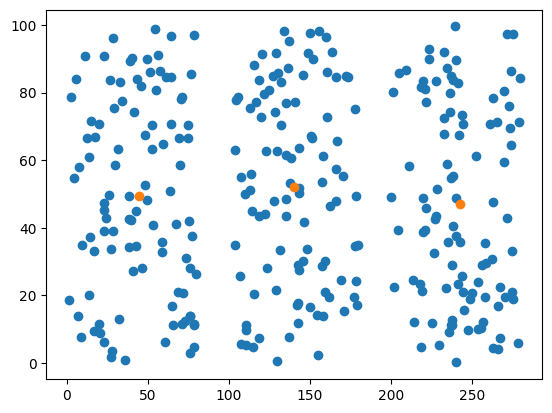

Quantidade de amostras em cada grupo: [100, 100, 100]


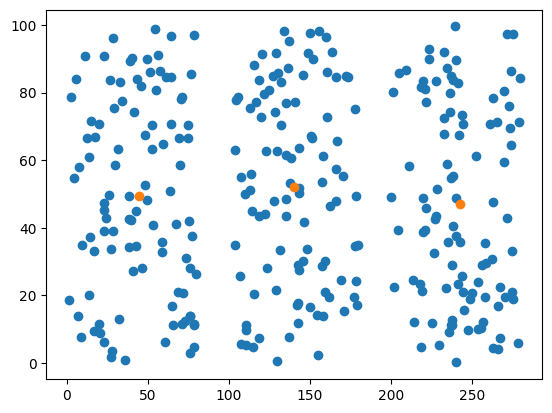

Quantidade de amostras em cada grupo: [100, 100, 100]


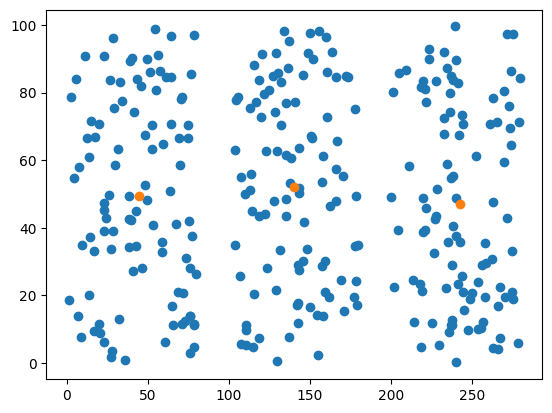

In [ ]:
for ajustes in range(10): #define n iterações
  plt.scatter(valores_x,valores_y)
  
  #Cria matriz de pertinência 25 x quantidade_grupos por meio da verificação das distâncias de cada elemento aos centros
  #O centro que for mais perto de cada ponto eu defino que tal ponto pertence a este centro
  matriz = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
  distancia = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
  d = 0
  #printa matriz de distâncias
  for i in range(len(valores_x)):
    for j in range(quantidade_grupos):
      d = math.sqrt((math.pow((valores_x[i] - centros_x[j]),2))+(math.pow((valores_y[i] - centros_y[j]),2)))
      distancia[i][j] = d
  

  #monta matriz de pertinência
  for i in range(len(valores_x)):
    matriz[i][(distancia[i].index(min(distancia[i])))] = 1
 
  #recalcula o centro
  media_x = [0 for i in range(quantidade_grupos)]
  media_y = [0 for i in range(quantidade_grupos)]
  quantidade_de_cada_grupo = [0 for i in range(quantidade_grupos)]


  for i in range(len(valores_x)):
    for j in range(quantidade_grupos): 
      if(matriz[i][j] == 1):
        media_x[j] += valores_x[i]
        media_y[j] += valores_y[i]
        quantidade_de_cada_grupo[j] += 1
  print("Quantidade de amostras em cada grupo: " + str(quantidade_de_cada_grupo))

  for i in range(quantidade_grupos):
    centros_x[i] = media_x[i]/quantidade_de_cada_grupo[i]
    centros_y[i] = media_y[i]/quantidade_de_cada_grupo[i]

  plt.scatter(centros_x,centros_y)
  plt.show()

<strong>Teste</strong>


Após a execução do treinamento, deve-se testar se para outra geração de amostra os centros gerados são válidos. Logo, gera-se uma nova versão das amostras e se calcula quantas amostras fazem parte de cada grupo: 

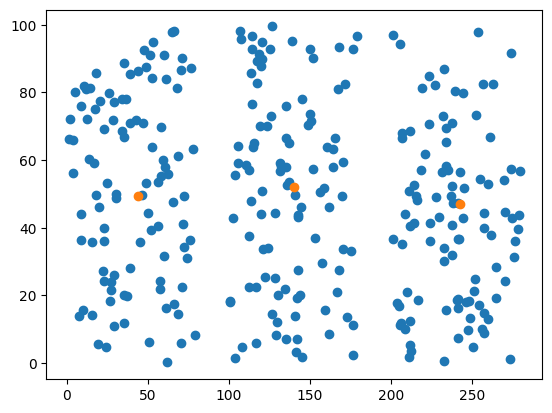

Quantidade de amostras em cada grupo: [100, 100, 100]


In [ ]:
#Gera nova base pra testar com os centros como estão:

valores_x = []
valores_y = []

#Define quantidade de grupos
quantidade_grupos = 3
#Define n valores aleatórios
quantidade_amostras = 300
for j in range(quantidade_grupos):
  for i in range(int(quantidade_amostras/quantidade_grupos)):
    valores_x.append(random.uniform(((quantidade_amostras/quantidade_grupos)*j),((quantidade_amostras/quantidade_grupos)*(j+1))-20))
    valores_y.append(random.uniform(0,100))
plt.scatter(valores_x,valores_y)
plt.scatter(centros_x,centros_y)
plt.show()

#Define matriz de pertinência para verificarmos quantos possuem em cada grupo
matriz = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
distancia = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
d = 0
#printa matriz de distâncias
for i in range(len(valores_x)):
  for j in range(quantidade_grupos):
    d = math.sqrt((math.pow((valores_x[i] - centros_x[j]),2))+(math.pow((valores_y[i] - centros_y[j]),2)))
    distancia[i][j] = d


#monta matriz de pertinência
for i in range(len(valores_x)):
  matriz[i][(distancia[i].index(min(distancia[i])))] = 1

#recalcula o centro
media_x = [0 for i in range(quantidade_grupos)]
media_y = [0 for i in range(quantidade_grupos)]
quantidade_de_cada_grupo = [0 for i in range(quantidade_grupos)]


for i in range(len(valores_x)):
  for j in range(quantidade_grupos): 
    if(matriz[i][j] == 1):
      media_x[j] += valores_x[i]
      media_y[j] += valores_y[i]
      quantidade_de_cada_grupo[j] += 1
print("Quantidade de amostras em cada grupo: " + str(quantidade_de_cada_grupo))

  


Neste caso, percebe-se que todas as amostras foram classificadas com sucesso.


<h1><strong>Supervisionado</strong></h1>

<strong>Treinamento</strong>

Para o treinamento do algoritmo C-means supervisionado, a diferença se encontra no fato de já sabermos a qual grupo cada amostra deve pertencer. Deste modo, podemos realizar o mesmo algoritmo do não-supervisionado, porém, com os centros já alocados corretamente na parcela espacial que se encontra cada grupo. Para isso, podemos colocar o centro na posição de uma amostra existente de determinado grupo ou aleatoriamente. Para este experimento foi seguida a segunda abordagem. Além disso, como sabemos previamente o grupo de cada amostra, podemos também adicionar como critério de parada das iterações a verificação de acertos do agrupamento, além do número máximo de iterações.

300


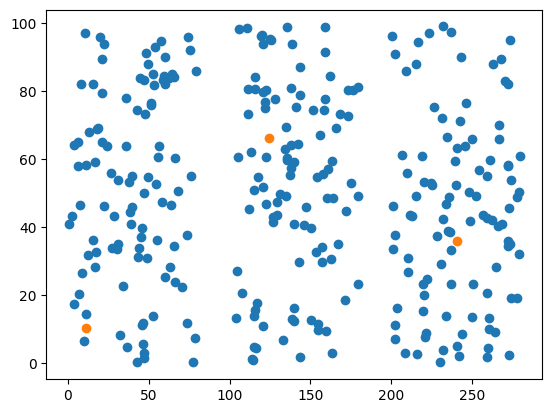

In [ ]:
#Define quantidade de grupos
quantidade_grupos = 3
#Define n valores aleatórios
quantidade_amostras = 300
valores_x = []
valores_y = []
for j in range(quantidade_grupos):
  for i in range(int(quantidade_amostras/quantidade_grupos)):
    valores_x.append(random.uniform(((quantidade_amostras/quantidade_grupos)*j),((quantidade_amostras/quantidade_grupos)*(j+1))-20))
    valores_y.append(random.uniform(0,100))
plt.scatter(valores_x,valores_y)
print(len(valores_x))

#Define centro dos grupos inicialmente aleatórios
centros_x = []
centros_y = []
for j in range(quantidade_grupos):
  centros_x.append(random.uniform(((quantidade_amostras/quantidade_grupos)*j),((quantidade_amostras/quantidade_grupos)*(j+1))-20))
  centros_y.append(random.uniform(0,100))
plt.scatter(centros_x, centros_y)

#Mostra disposição inicial
plt.show()


Quantidade de amostras em cada grupo: [76, 123, 101]


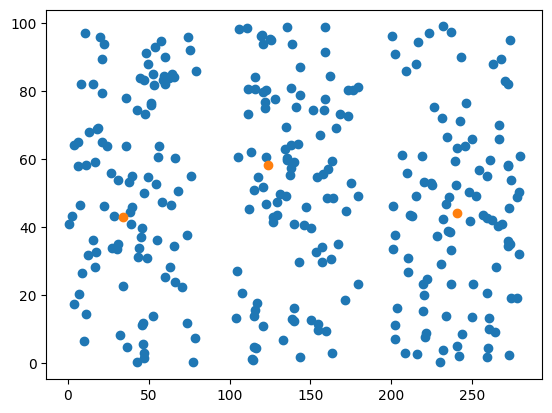

Quantidade de amostras em cada grupo: [97, 102, 101]


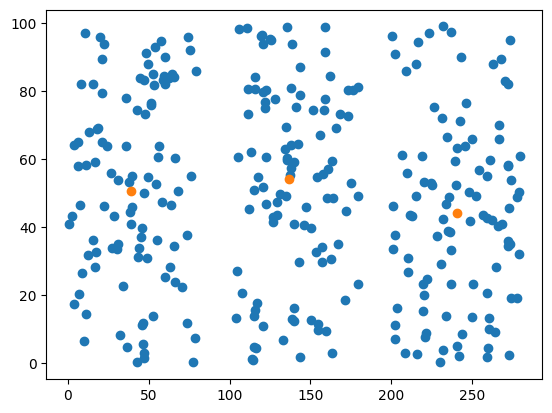

Quantidade de amostras em cada grupo: [100, 100, 100]


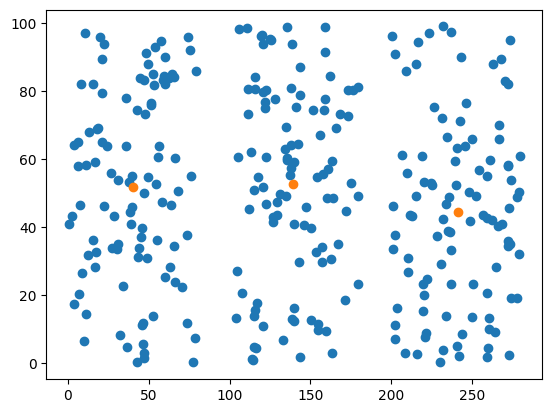

In [ ]:
ajustes = 0
tudo_certo = False
while(ajustes < 10 and tudo_certo == False): #define n iterações
  plt.scatter(valores_x,valores_y)
  
  #Cria matriz de pertinência 25 x quantidade_grupos por meio da verificação das distâncias de cada elemento aos centros
  #O centro que for mais perto de cada ponto eu defino que tal ponto pertence a este centro
  matriz = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
  distancia = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
  d = 0
  #printa matriz de distâncias
  for i in range(len(valores_x)):
    for j in range(quantidade_grupos):
      d = math.sqrt((math.pow((valores_x[i] - centros_x[j]),2))+(math.pow((valores_y[i] - centros_y[j]),2)))
      distancia[i][j] = d
  

  #monta matriz de pertinência
  for i in range(len(valores_x)):
    matriz[i][(distancia[i].index(min(distancia[i])))] = 1
 
  #recalcula o centro
  media_x = [0 for i in range(quantidade_grupos)]
  media_y = [0 for i in range(quantidade_grupos)]
  quantidade_de_cada_grupo = [0 for i in range(quantidade_grupos)]


  for i in range(len(valores_x)):
    for j in range(quantidade_grupos): 
      if(matriz[i][j] == 1):
        media_x[j] += valores_x[i]
        media_y[j] += valores_y[i]
        quantidade_de_cada_grupo[j] += 1
  print("Quantidade de amostras em cada grupo: " + str(quantidade_de_cada_grupo))
  

  
  for i in range(quantidade_grupos):
    centros_x[i] = media_x[i]/quantidade_de_cada_grupo[i]
    centros_y[i] = media_y[i]/quantidade_de_cada_grupo[i]

  plt.scatter(centros_x,centros_y)
  plt.show()
  ajustes += 1

  #verifica se tudo está correto
  if(max(quantidade_de_cada_grupo) == min(quantidade_de_cada_grupo)):
    tudo_certo = True
       

<strong>Teste</strong>

Semelhantemente à parcela não supervisionada, deve-se testar o resultado obtido de centros:

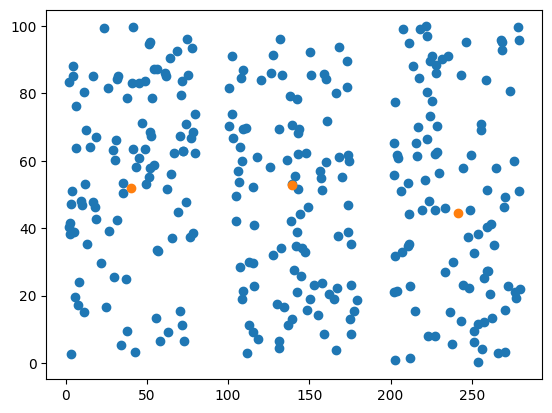

Quantidade de amostras em cada grupo: [100, 100, 100]


In [ ]:
#Gera nova base pra testar com os centros como estão:

valores_x = []
valores_y = []

#Define quantidade de grupos
quantidade_grupos = 3
#Define n valores aleatórios
quantidade_amostras = 300
for j in range(quantidade_grupos):
  for i in range(int(quantidade_amostras/quantidade_grupos)):
    valores_x.append(random.uniform(((quantidade_amostras/quantidade_grupos)*j),((quantidade_amostras/quantidade_grupos)*(j+1))-20))
    valores_y.append(random.uniform(0,100))
plt.scatter(valores_x,valores_y)
plt.scatter(centros_x,centros_y)
plt.show()

#Define matriz de pertinência para verificarmos quantos possuem em cada grupo
matriz = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
distancia = [[0 for i in range(quantidade_grupos)] for j in range(quantidade_amostras)]
d = 0
#printa matriz de distâncias
for i in range(len(valores_x)):
  for j in range(quantidade_grupos):
    d = math.sqrt((math.pow((valores_x[i] - centros_x[j]),2))+(math.pow((valores_y[i] - centros_y[j]),2)))
    distancia[i][j] = d


#monta matriz de pertinência
for i in range(len(valores_x)):
  matriz[i][(distancia[i].index(min(distancia[i])))] = 1

#recalcula o centro
media_x = [0 for i in range(quantidade_grupos)]
media_y = [0 for i in range(quantidade_grupos)]
quantidade_de_cada_grupo = [0 for i in range(quantidade_grupos)]


for i in range(len(valores_x)):
  for j in range(quantidade_grupos): 
    if(matriz[i][j] == 1):
      media_x[j] += valores_x[i]
      media_y[j] += valores_y[i]
      quantidade_de_cada_grupo[j] += 1
print("Quantidade de amostras em cada grupo: " + str(quantidade_de_cada_grupo))

  
